In [34]:
import numpy as np
import pandas as pd
df=pd.read_csv("Company_Data.csv")

In [35]:
#finding rows and cols
df.shape

(400, 11)

In [36]:
#first 5 rows
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [37]:
# Univariate Analysis
# Get descriptive statistics for a single variable
df.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [38]:
#finding any null values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [39]:
# Bivariate Analysis
# Get correlation between two variables
df["Price"].corr(df["Sales"])

-0.44495072784657264

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

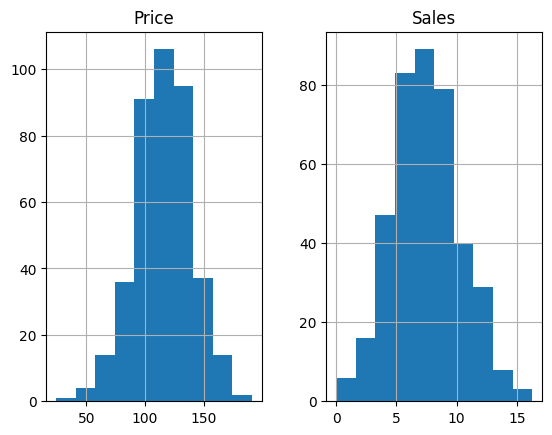

In [40]:
#Plotting histogram for two variables
df[['Price','Sales']].hist()

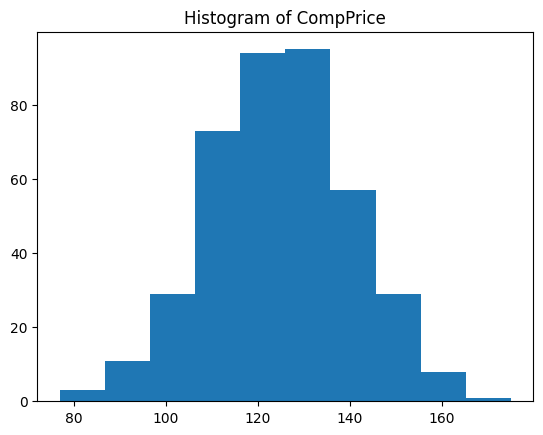

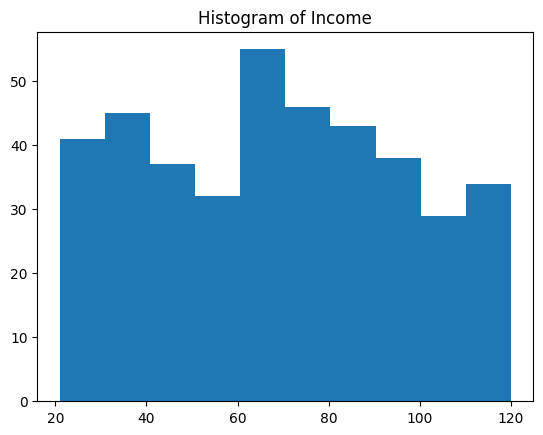

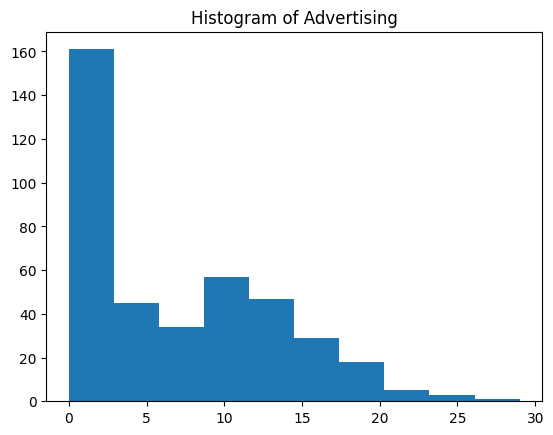

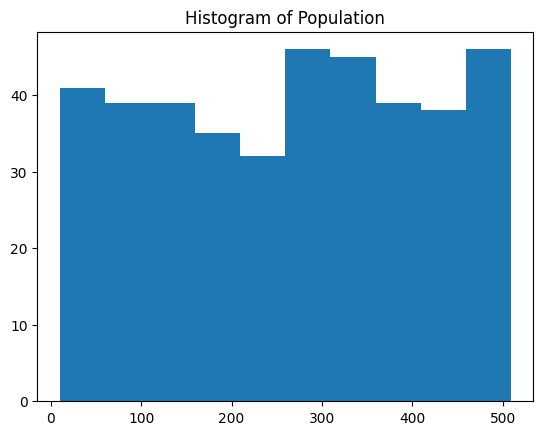

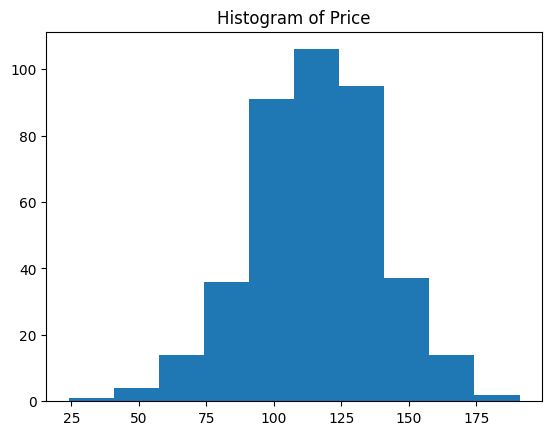

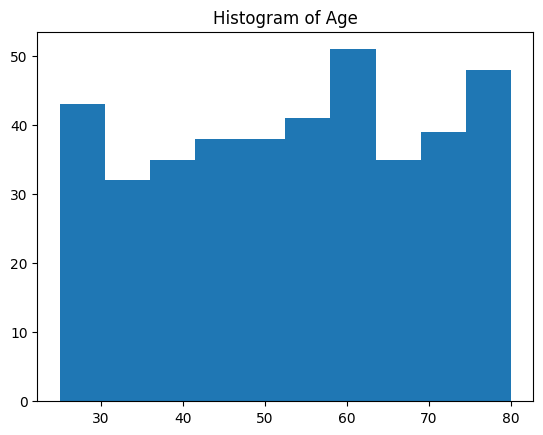

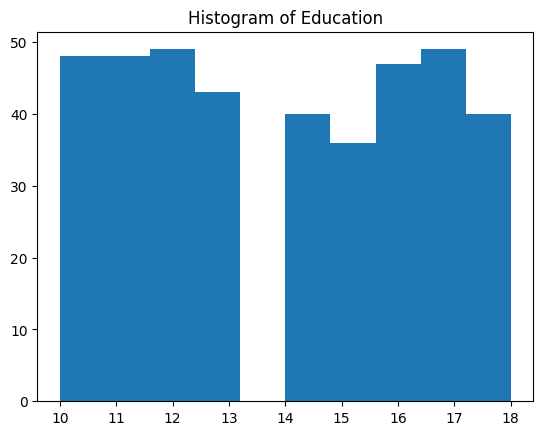

In [41]:
# Loop through each continious variable and create a histogram
import matplotlib.pyplot as plt
for x_variable in df.select_dtypes(include=["int64"]):
  plt.hist(df[x_variable])
  plt.title("Histogram of " + x_variable)
  plt.show()


In [42]:
# So by seeing the histogram., we can conclude that the data following normal distribution for all continious variables

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [45]:
#as given that Sales is the target variable., Decision tree classifier method applied for categorical variables.
# so we need to convert continious to categorical variables

In [46]:
# Specify the column containing sales data
sales_column = 'Sales'

# Define the bins for converting sales to categorical variables
bins = [0, 5, 10, 20, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']

# Convert sales to categorical variable
df['Sales_category'] = pd.cut(df[sales_column], bins=bins, labels=labels, right=False)

# Convert the dtype of the new column to 'object'
df['Sales_category'] = df['Sales_category'].astype('object')

# Drop the original sales column if needed
df.drop(columns=[sales_column], inplace=True)

In [47]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CompPrice       400 non-null    int64 
 1   Income          400 non-null    int64 
 2   Advertising     400 non-null    int64 
 3   Population      400 non-null    int64 
 4   Price           400 non-null    int64 
 5   ShelveLoc       400 non-null    object
 6   Age             400 non-null    int64 
 7   Education       400 non-null    int64 
 8   Urban           400 non-null    object
 9   US              400 non-null    object
 10  Sales_category  400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [49]:
#Label Encoding the obj Dtypes
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.select_dtypes(include=["object"]):
    df[column] = LE.fit_transform(df[column])
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [50]:
#choosing X and Y variables
y=df["Sales_category"]
x=df.iloc[:,:-1]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [51]:
#standardization will fit the values b/w -3 to +3

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
#giving columns names to the converted data
SS_x.columns = list(x)
SS_x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925


In [52]:
#Data partition
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 10)
(120, 10)
(280,)
(120,)


In [53]:
#fitting model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
#defaultly it takes gini as criterion
#dt=DecisionTreeClassifier(criterion = "gini")
#model fitting
dt.fit(x_train,y_train)
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)
#
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_train,y_pred_train)
ac2=accuracy_score(y_test,y_pred_test)
variance = ac1-ac2
print("Trainig accuracy",ac1.round(3))
print("Test accuracy",ac2.round(3))
print("Variance is ",variance.round(3))

Trainig accuracy 1.0
Test accuracy 0.625
Variance is  0.375


In [54]:
#cross validation method
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(x_train,y_train)
    y_pred_train = dt.predict(x_train)
    y_pred_test = dt.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
print("Cross validation trainig score ",np.mean(training_accuracy).round(3))
print("Cross validation test score",np.mean(test_accuracy).round(3))
print("Variance between Training and Testing :",(ac1-ac2).round(3))

Cross validation trainig score  1.0
Cross validation test score 0.605
Variance between Training and Testing : 0.395


In [55]:
#Here we got least test accuracy. to improve test accuracies we will use ensemble methods


In [56]:
# printing max nodes and deapth of Decision tree
print("The no of nodes in the tree:",dt.tree_.node_count)
print("The no of Depth of the tree:",dt.tree_.max_depth)


The no of nodes in the tree: 135
The no of Depth of the tree: 12


In [57]:
# Decreasing the  Deapth of a tree and again fitting the model

In [60]:
#cross validation method ----- taking max_depth = 8 ----------------
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8)

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(x_train,y_train)
    y_pred_train = dt.predict(x_train)
    y_pred_test = dt.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
print("Cross validation trainig score ",np.mean(training_accuracy).round(3))
print("Cross validation test score",np.mean(test_accuracy).round(3))
print("Variance between Training and Testing :",(ac1-ac2).round(3))

Cross validation trainig score  0.955
Cross validation test score 0.613
Variance between Training and Testing : 0.341


In [61]:
#cross validation method ----- taking max_depth = 6----------------
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6)

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(x_train,y_train)
    y_pred_train = dt.predict(x_train)
    y_pred_test = dt.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
print("Cross validation trainig score ",np.mean(training_accuracy).round(3))
print("Cross validation test score",np.mean(test_accuracy).round(3))
print("Variance between Training and Testing :",(ac1-ac2).round(3))

Cross validation trainig score  0.88
Cross validation test score 0.622
Variance between Training and Testing : 0.258


In [62]:
# For max depth 12 we got variance = 35%
# For max depth 8 we got variance = 34%
# For max depth 6 we got variance = 25%
# so for better results consider max_depth is 6

In [63]:
# printing max nodes and deapth of Decision tree
print("The no of nodes in the tree:",dt.tree_.node_count)
print("The no of Depth of the tree:",dt.tree_.max_depth)


The no of nodes in the tree: 71
The no of Depth of the tree: 6


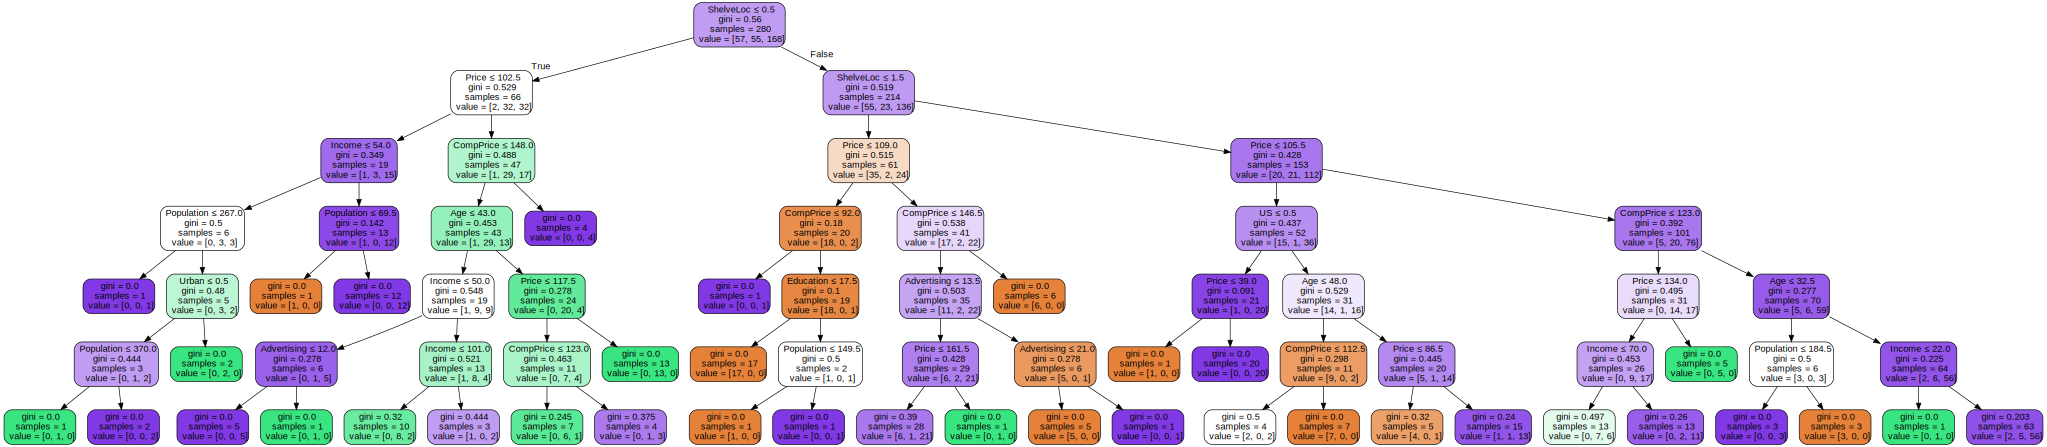

In [64]:
# Graphical view of Decision tree
from sklearn.tree import export_graphviz
#!pip install graphviz
import graphviz
dot_data = export_graphviz(dt, out_file=None, feature_names=x.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
# Display the graph
graph


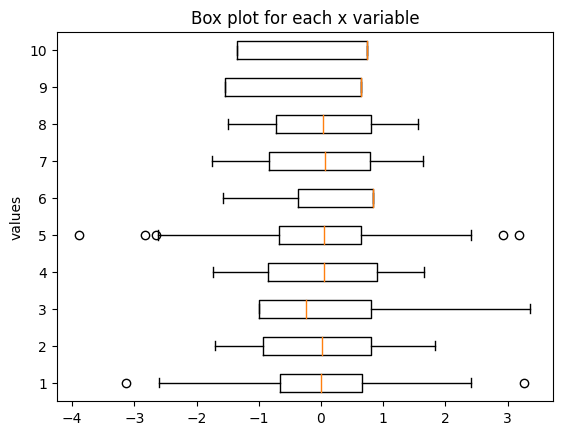

In [65]:
#-------------------Univariate analysis-----------------------------------------------
#constructing box for all x_variables value counts
#Visualizing the data
import matplotlib.pyplot as plt
plt.boxplot(SS_x,vert=False)
plt.title("Box plot for each x variable")
plt.ylabel("values")
plt.show()

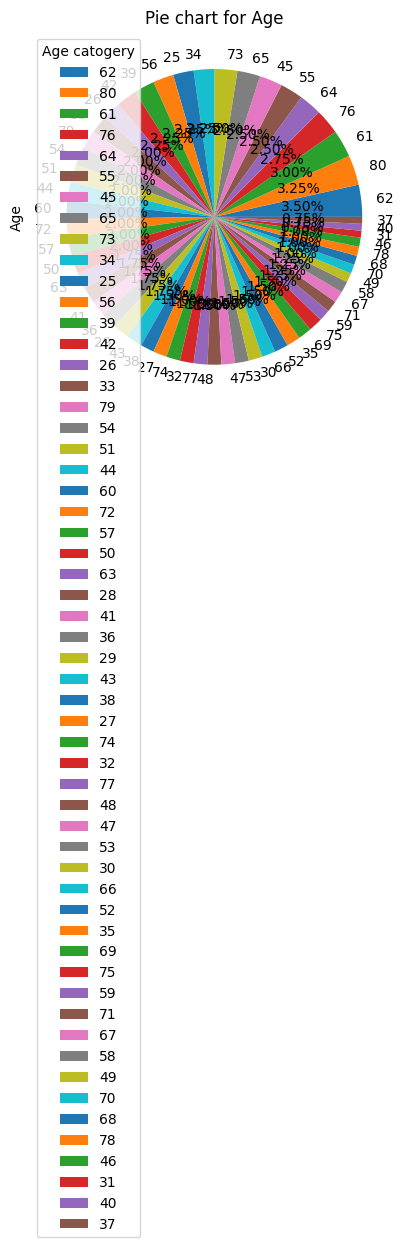

In [66]:
##-------------------Univariate analysis-----------------------------------------------
#constructing pie-chart for type variable value counts

import matplotlib.pyplot as plt
df['Age'].value_counts().plot(kind='pie',autopct='%1.2f%%')
#autopct='%1.2f%%' ----> it gives what % of single catogery occupied on entire
plt.legend(title="Age catogery") #gives which color is for which one
plt.title("Pie chart for Age")
plt.show()


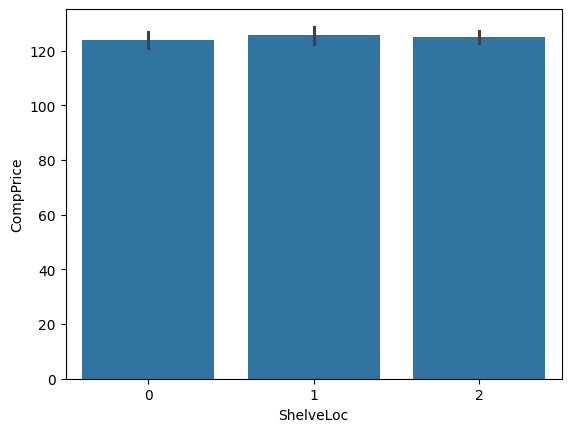

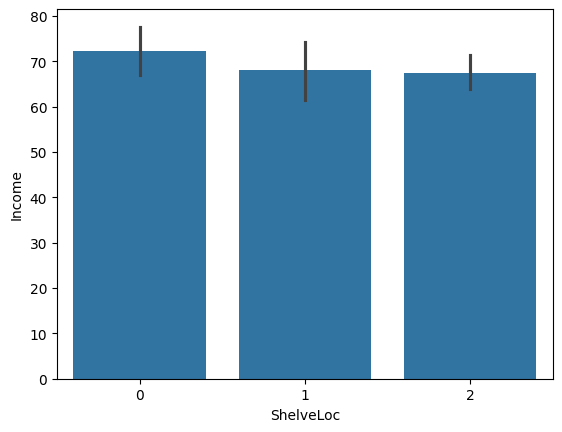

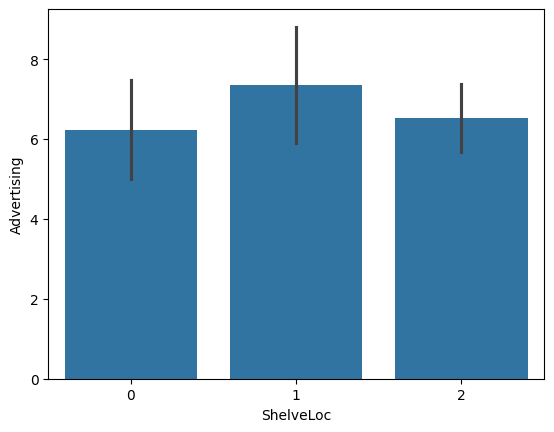

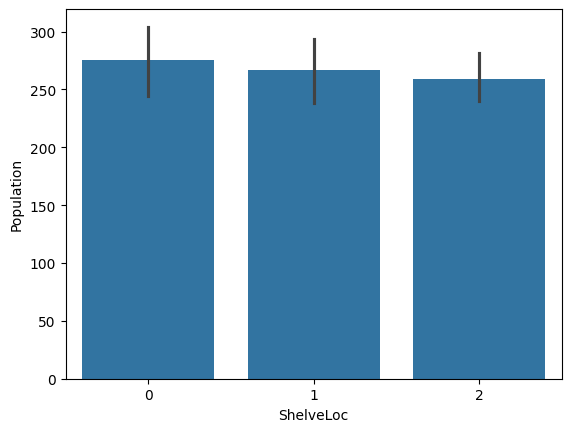

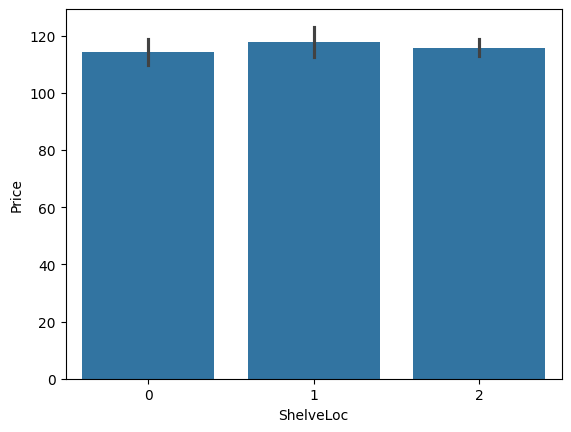

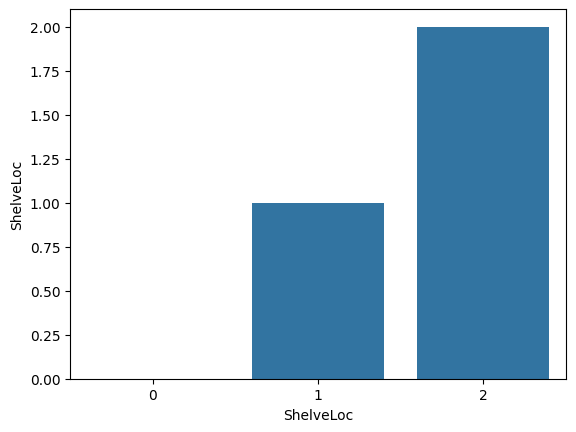

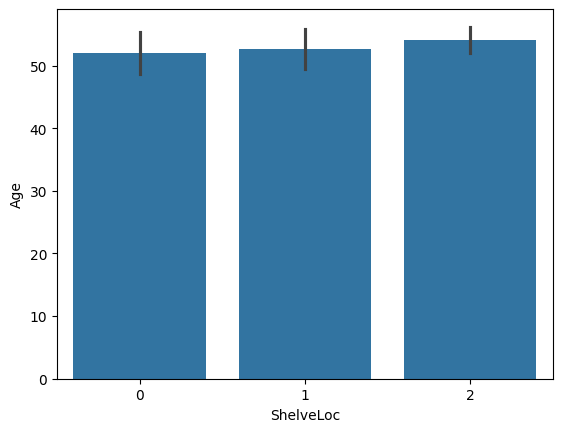

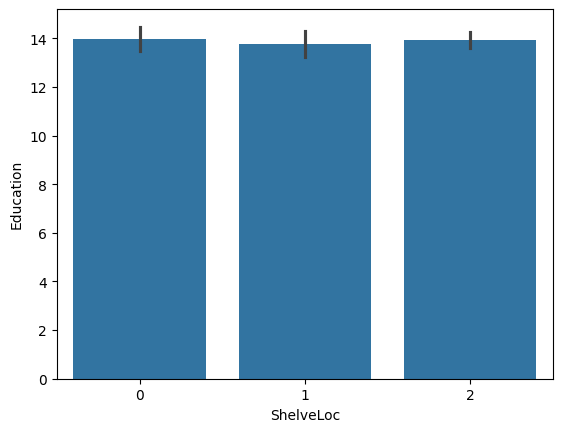

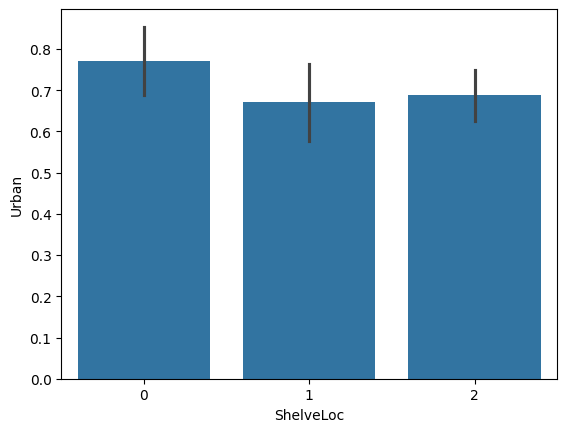

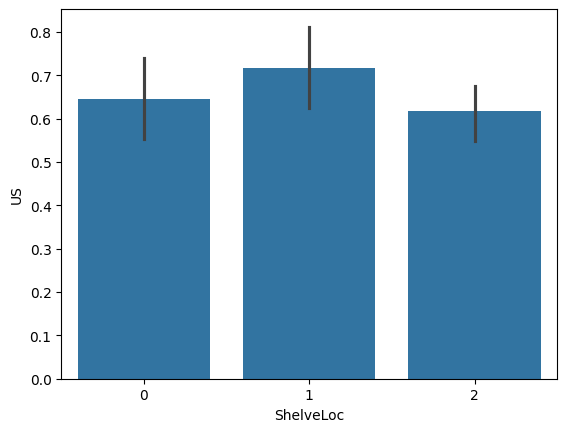

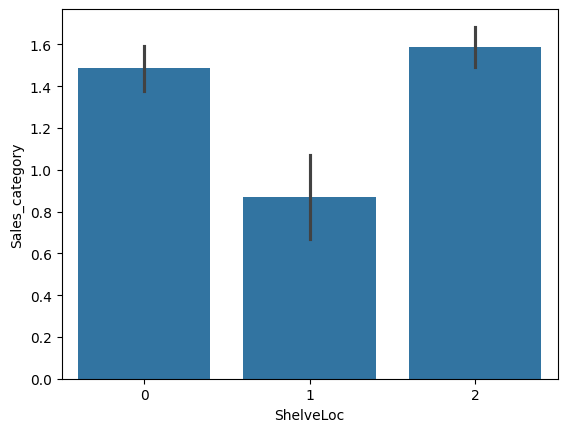

In [70]:
##Bar graph for every x- variable with ShelveLoc
import seaborn as sns
import matplotlib.pyplot as plt
for column in df.select_dtypes(include=["int64"]):
  sns.barplot(x=df['ShelveLoc'], y=df[column])
  plt.show()


In [71]:
#Scatter plot for each pair of features
for i, column1 in enumerate(df.select_dtypes(include=["int64"])):
    for column2 in df.select_dtypes(include=["int64"])[i+1:]:
        sns.scatterplot(x=df[column1], y=df[column2], hue=df['ShelveLoc'])
        plt.show()


Output hidden; open in https://colab.research.google.com to view.